In [1]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('993df56f2f58d7cf01eb581421e762de4c45172b9979ae950bc1333a')
pro = ts.pro_api()

import mpl_finance as mpf
# import matplotlib.finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib as mpl
import seaborn as sns
sns.set()
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
LOCAL = not True

In [3]:
stock_code = "002429.SZ"
start_date = "201911026"
end_date = "20200310"

if LOCAL:
    pool_df = pd.read_csv("./data/stock_basic_info.csv")
else:
    pool_df = pro.stock_basic()

if LOCAL:
    for file_dir , _ , files in os.walk("./data/daily/"):
        for i,file_name in enumerate(files):
            if file_name[:9] == stock_code:
                daily_df = pd.read_csv(file_dir+file_name)
                daily_df["trade_date"] = daily_df["trade_date"].astype("str")
                break
else:
    daily_df = pro.daily(ts_code = stock_code,start_date = start_date, end_date = end_date )
    
daily_df["trade_date2"] = daily_df["trade_date"].copy()
daily_df["trade_date"] = pd.to_datetime(daily_df["trade_date"]).map(date2num)
daily_df.sort_values(by="trade_date2", ascending=True,inplace=True)
daily_df["dates"] = np.arange(0,len(daily_df))
print(len(daily_df))
daily_df.head()

85


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,trade_date2,dates
84,002429.SZ,737367.0,2.98,2.99,2.94,2.95,2.97,-0.02,-0.6734,210867.82,62409.571,20191104,0
83,002429.SZ,737368.0,2.94,3.08,2.94,3.05,2.95,0.10,3.3898,644516.67,195146.824,20191105,1
82,002429.SZ,737369.0,3.05,3.12,3.02,3.05,3.05,0.00,0.0000,460660.60,141047.824,20191106,2
81,002429.SZ,737370.0,3.05,3.10,3.03,3.06,3.05,0.01,0.3279,342830.99,105330.217,20191107,3
80,002429.SZ,737371.0,3.09,3.11,3.03,3.03,3.06,-0.03,-0.9804,337009.79,103484.760,20191108,4


In [4]:
def get_kdj(df):
    low_list = df['low'].rolling(9, min_periods=9).min()
    low_list.fillna(value = df['low'].expanding().min(), inplace = True)
    high_list = df['high'].rolling(9, min_periods=9).max()
    high_list.fillna(value = df['high'].expanding().max(), inplace = True)
    rsv = (df['close'] - low_list) / (high_list - low_list) * 100

    df['K'] = pd.DataFrame(rsv).ewm(com=2).mean()
    df['D'] = df['K'].ewm(com=2).mean()
    df['J'] = 3 * df['K'] - 2 * df['D']
    
    return df


In [5]:
daily_df = get_kdj(daily_df)
print(len(daily_df))
daily_df.head()

85


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,trade_date2,dates,K,D,J
84,002429.SZ,737367.0,2.98,2.99,2.94,2.95,2.97,-0.02,-0.6734,210867.82,62409.571,20191104,0,20.000000,20.000000,20.000000
83,002429.SZ,737368.0,2.94,3.08,2.94,3.05,2.95,0.10,3.3898,644516.67,195146.824,20191105,1,55.142857,41.085714,83.257143
82,002429.SZ,737369.0,3.05,3.12,3.02,3.05,3.05,0.00,0.0000,460660.60,141047.824,20191106,2,57.969925,49.083498,75.742778
81,002429.SZ,737370.0,3.05,3.10,3.03,3.06,3.05,0.01,0.3279,342830.99,105330.217,20191107,3,61.582418,54.275357,76.196539
80,002429.SZ,737371.0,3.09,3.11,3.03,3.03,3.06,-0.03,-0.9804,337009.79,103484.760,20191108,4,57.136087,55.373552,60.661156


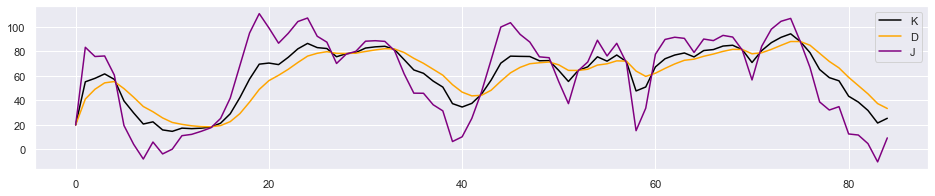

In [10]:
fig,ax2 = plt.subplots(figsize=(16,3))
plt.plot(daily_df.K.values, "black",label = "K")
plt.plot(daily_df.D.values, "orange",label = "D")
plt.plot(daily_df.J.values, "purple",label = "J")
plt.legend()
